# Drug reviews sentiment analysis


# Background information

A hospital or insurance provider is interested in efficiently extracting numeric ratings from patients' written review.  To this end we build a model using labelled, numerically, patient reviews. 

# Data exploration

The data comes from Drugs.com and is accessed through UCI's website. Click [here]('.//drugsComTrain_raw.tsv') to access data. Data was sourced by Kalummadi and Grer.

In [2]:
import pandas as pd


In [3]:
import numpy as np


In [4]:
import matplotlib.pyplot as plt

In [5]:
tr = pd.read_table('.//drugsComTrain_raw.tsv')

In [6]:
tr.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


There are five potential independent variables, one target variable, and a unique id column, for total of 7 columns.

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


There are very few missing values, only 'condition' has missing values of about 1,000, less than 1% of total sample.

In [8]:
trd = tr.dropna()

In [9]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  object 
 2   condition    160398 non-null  object 
 3   review       160398 non-null  object 
 4   rating       160398 non-null  float64
 5   date         160398 non-null  object 
 6   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


Dealing with missing values.

Removing nonsensical samples in condition by creating new, clean column. 

In [10]:
trd['condC']= trd['condition'].map(lambda x: x if "users" not in str(x) else '')

C:\Users\jmark\AppData\Local\Temp\ipykernel_33052\1641903905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trd['condC']= trd['condition'].map(lambda x: x if "users" not in str(x) else '')


In [11]:
 trd= trd.drop('condition', axis = 1)

In [12]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  object 
 2   review       160398 non-null  object 
 3   rating       160398 non-null  float64
 4   date         160398 non-null  object 
 5   usefulCount  160398 non-null  int64  
 6   condC        160398 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


It initially appears there are 812 unique condtions, but some entries may overlap (i.e. heart failure /attack and different types of diabetes)

In [13]:
len(trd.condC.unique())

812

In [14]:


count = 0
sets = {}
for i in trd.condC:
    if sets.get(i, 0) >0:
        sets[i]+=1
    else:
        sets[i]=1


In [15]:
len(sets.values())

812

The data is fairly balanced by drug, uniformly distributed.

In [16]:


count = 0
sets = {}
for i in trd.drugName:
    if sets.get(i, 0) >0:
        sets[i]+=1
    else:
        sets[i]=1


In [17]:
len(sets)

3431

In [18]:
len(set(trd.drugName.sort_values()))

3431

It initially appears there are 3431 unique drugs, however names may overlap with eachother, and not be so distinct.

Written review metrics:

In [19]:
sm=0
for i in range(10):
    sm += len(trd['review'][i])


sm/11/5

90.0

About 90 words per review, given sample of 11 and average 5 words per sentence.

Example below:


In [20]:
trd.review[22]

'"Nexplanon does its job. I can have worry free sex. The only thing is that my periods are sometimes light and sometimes heavy. Sometimes they go away and sometimes they show up unexpected. I also feel somewhat depressed. Not sure if its Nexplanon or not. I&#039;ve had Nexplanont for about 2 months now, but despite the side effects its the most effective birth control I&#039;ve ever used and I do not plan on taking it out."'

Below is a historgam of the patients' ratings.

(array([21504.,  6879.,  6465.,  4980.,  7959.,  6301.,  9395., 18791.,
        27379., 50745.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

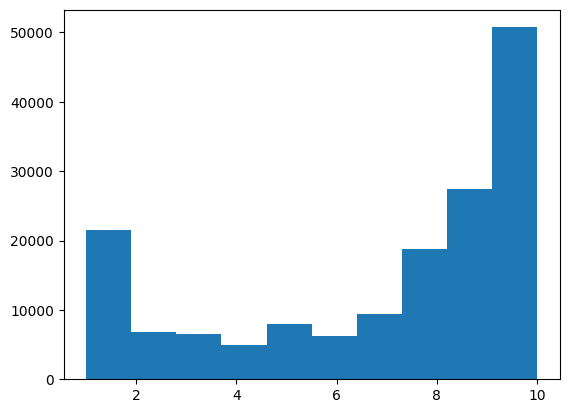

In [21]:
fig, ax =plt.subplots()

ax.hist(trd['rating'])

Ratings are not normally distributed. Counts are highest at the worst and best ratings.

## Data processing

Data processing involves tokenizing and then performing either tf-idf or word embedding processing on the tokens.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
yrat = trd.rating
trdd = trd.drop('rating', axis = 1)

In [24]:
rev = trd.review

In [25]:
#from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)


In [26]:
from nltk import FreqDist

First tokenizing, then creating the distribution frequencies for all invidual items. 

def rowFrs(reviews):
    Frds= []

    for i in trd.review:
        lw= i.lower()
        tkn = tokenizer.tokenize(lw)
        Frd= FreqDist(tkn)
        
        Frds.append(Frd)
    return Frds

In [28]:
Frqs= rowFrs(rev)

In [29]:
len(Frqs)

160398

Expand below to include all rows, i.e. creating the frequency distribution for the corpus.  Also choose a sub-sample space for this project of 16,000 (10% of total) for better computing.  

In [30]:
com = trd[0:16000]

In [134]:
def c2v(com):
    
    Frds= []

    for i in com:
        lw= i.lower()
        tkn = tokenizer.tokenize(lw)
        Frd= FreqDist(tkn)
        
        Frds.append(Frd)

    comb = ""
    for i in com['review']:
        comb += str(i)
    comb = comb.lower()
    ttestw= tokenizer.tokenize(comb)


    stopwords_list = stopwords.words('english')

    w_words_stopped = [word for word in ttestw if word not in stopwords_list]
    w_words_stoppedC = [word for word in w_words_stopped if '039' not in word]
    
    FD= FreqDist(w_words_stoppedC)
    df = pd.DataFrame(data = dict(FD), index = [0])#range16k
    dft=df.transpose()
    df200 =dft.sort_values(by= 0, axis = 0).tail(200)
    adic={}
    for i in range(len(df200[0])):
        indx =df200.index[i]
        adic[indx]=df200[0][i] 

        
    
    wtfids = []
    for i in range(16000):
        tfidfs =list([])
        for k in adic.keys():
            num = Frqs[i].get(k,0)
            den = adic[k]
            tfidf = num/den
            tfidfs.append(tfidf)
        wtfids.append(tfidfs)
        
    xvals = np.asarray(wtfids)
    return xvals

### Pipelines


In [135]:
from sklearn.pipeline import Pipeline

In [136]:
###("linr", linregt)###

In [137]:
linregt = linear_model.LinearRegression()
pipe1= Pipeline(steps=[("tfidf", c2v),("linr", linregt)])



In [139]:
pipe1.fit(com)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<function c2v at 0x0000015C81142A60>' (type <class 'function'>) doesn't

In [107]:
mean_squared_error( y_train, ppred)


8.141032346511635

comb = ""
for i in com['review']:
    comb += str(i)

comb = comb.lower()

ttestw= tokenizer.tokenize(comb)

In [ ]:
from nltk.corpus import stopwords



stopwords_list = stopwords.words('english')

w_words_stopped = [word for word in ttestw if word not in stopwords_list]

w_words_stoppedC = [word for word in w_words_stopped if '039' not in word]

FD= FreqDist(w_words_stoppedC)

Converting to dataframe to sort and get top 200 words.

df = pd.DataFrame(data = dict(FD), index = [0])#range16k

dft=df.transpose()

dft.head()

dft.sort_values(by= 0, axis = 0, ascending = False)

df200 =dft.sort_values(by= 0, axis = 0).tail(200)

Adic is the inverse frequency part of tf-idf.

adic={}
for i in range(len(df200[0])):
    indx =df200.index[i]
    adic[indx]=df200[0][i] 
    


# Data modeling

## Baseline tf-idf model.

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

Creating the tf-idf matrix.


wtfids = []
for i in range(16000):
    tfidfs =list([])
    for k in adic.keys():
        num = Frqs[i].get(k,0)
        den = adic[k]
        tfidf = num/den
        tfidfs.append(tfidf)
    wtfids.append(tfidfs)

Taking the first 16000 of the y-var (rating).

In [109]:
revscut= trd.rating[0:16000]

In [110]:
yvals = np.asarray(revscut)

xvals = np.asarray(wtfids)

In [111]:
x_train, x_val, y_train,  y_val = train_test_split(xvals, yvals, random_state = 2)

Try baseline regression tree.

In [112]:
regrtr1 = DecisionTreeRegressor(max_depth = 3)


In [113]:
regrtr1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [114]:
prds4 = regrtr1.predict(x_train)

In [115]:
mean_squared_error(y_train, prds4)

10.176464790716771

In [56]:
rmse = mean_squared_error(y_train, prds4)**.5
rmse

3.190057176715924

In [57]:
regrtr1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32960934,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02415096,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<BarContainer object of 200 artists>

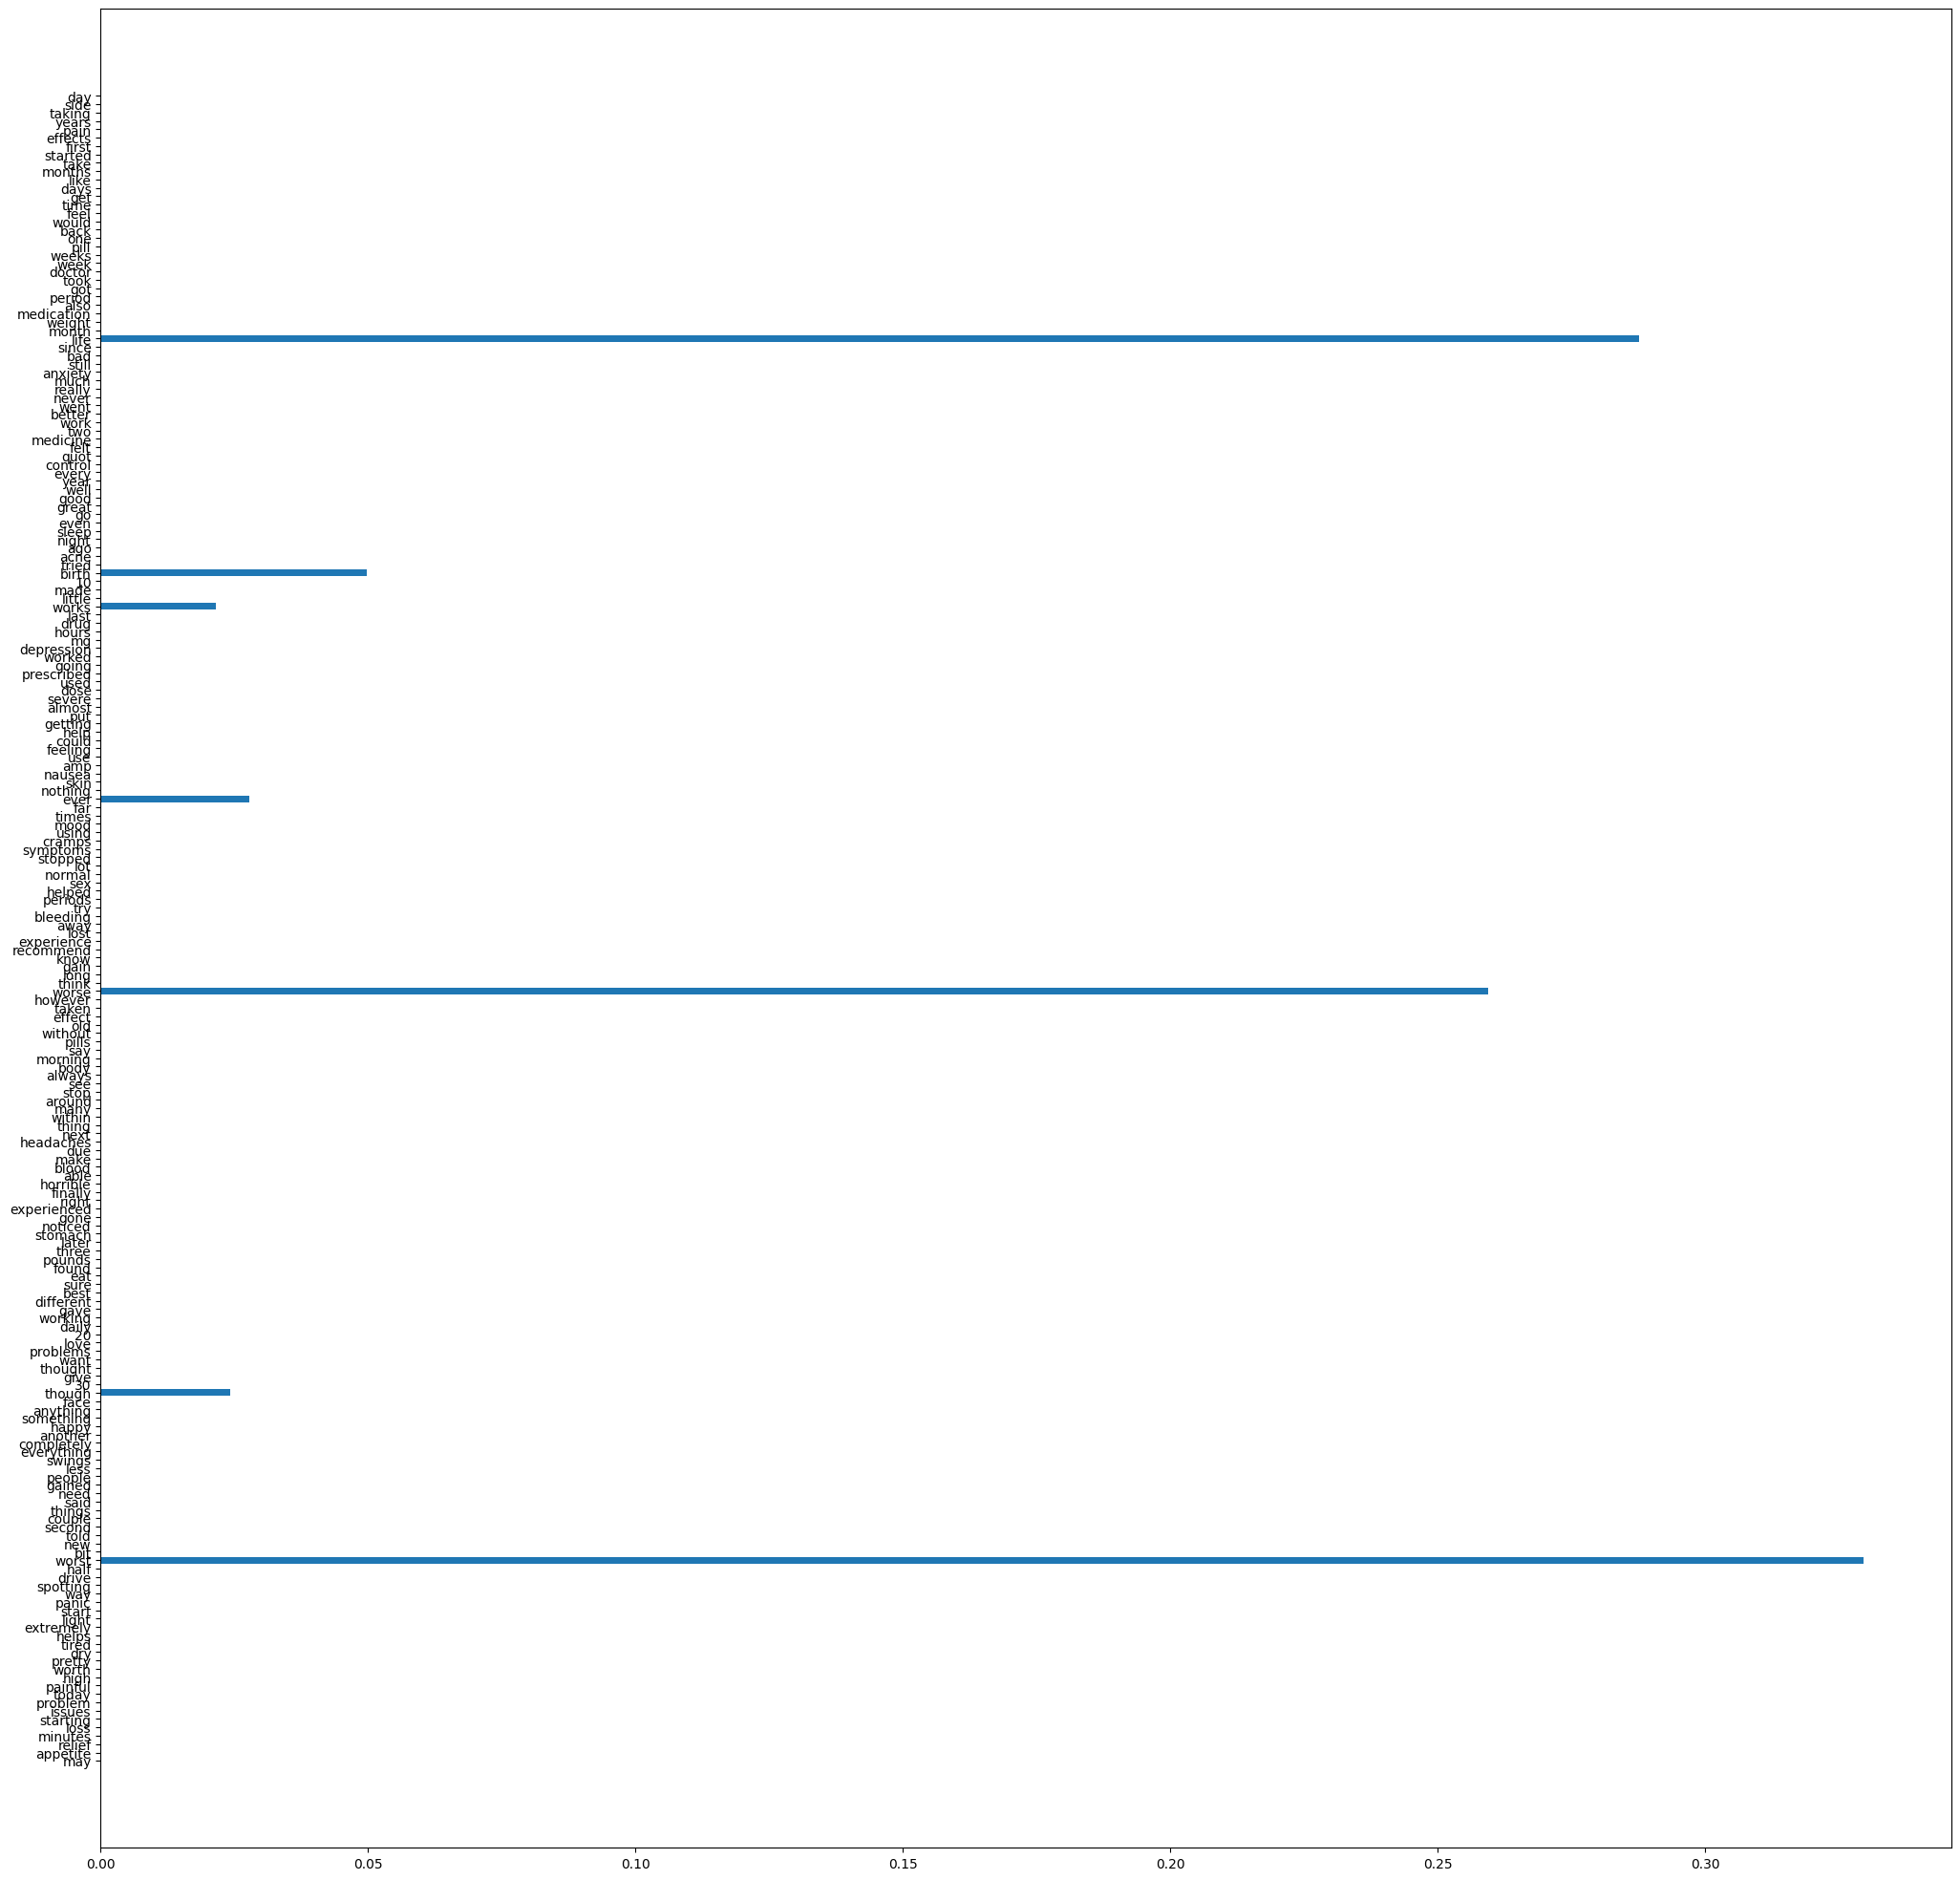

In [58]:
#fig, ax =fig
plt.figure(figsize=(25,25))
plt.barh(list(adic.keys()), regrtr1.feature_importances_)

Most important features:  worse, love

In [59]:
prds4val = regrtr1.predict(x_val)

Baseline mse is 8, scale is 10 points.

In [60]:
mean_squared_error(y_val, prds4val)

9.898097270874588

In [61]:
rmse = mean_squared_error(y_val, prds4val)**.5
rmse

3.1461241664744555

Again, not much overfitting. Try tree with greater depth to reduce underfitting:

In [62]:
regrtr1a = DecisionTreeRegressor(max_depth = 5)


In [63]:
regrtr1a.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [64]:
prds4 = regrtr1a.predict(x_train)

In [65]:
mean_squared_error(y_train, prds4)

9.693739045289481

In [66]:
rmse = mean_squared_error(y_train, prds4)**.5
rmse

3.1134770025310097

In [67]:
prds4val = regrtr1a.predict(x_val)

In [68]:
mean_squared_error(y_val, prds4val)

9.572180223941855

In [69]:
rmse = mean_squared_error(y_val, prds4val)**.5
rmse

3.0938940227392817

Allowing for additional depth, reduced underfitting, slightly. 

Running a linear regression model:

In [70]:
from sklearn import linear_model
lreg = linear_model.LinearRegression()





In [71]:
lreg.fit(x_train, y_train)

LinearRegression()

In [72]:
preds = lreg.predict(x_train)

In [73]:
mean_squared_error(y_train, preds)

8.141032346511635

In [74]:
rmse = mean_squared_error(y_train, preds)**.5
rmse

2.853249436434122

In [75]:
valpreds = lreg.predict(x_val)

In [76]:
mean_squared_error(y_val, valpreds)

8.12230730226126

In [77]:
rmse = mean_squared_error(y_val, valpreds)**.5
rmse

2.8499661931786595

Linear regression is more accurate than the baseline tree regressions. Not a lot, if any, overfitting, likely not underfitting either (2.84 rmse training and validation)

In [78]:
rfr = RandomForestRegressor(max_samples = 100)


In [79]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_samples=100)

In [80]:
prds5 = rfr.predict(x_train)

In [81]:
mean_squared_error(y_train, prds5)
                   

10.206212266203703

In [82]:
rmse = mean_squared_error(y_train, prds5)**.5
rmse

3.194716304494611

In [83]:
rfr.feature_importances_

array([0.00151765, 0.00229836, 0.00226839, 0.00120479, 0.0034931 ,
       0.00212484, 0.00384561, 0.00091341, 0.00182291, 0.00332704,
       0.00519817, 0.00451828, 0.00054414, 0.00228381, 0.0031311 ,
       0.00232843, 0.00621131, 0.00071698, 0.00132879, 0.00187488,
       0.00317337, 0.00558832, 0.0036269 , 0.00278956, 0.01690209,
       0.00170926, 0.00161803, 0.00540038, 0.00735827, 0.00138923,
       0.00071791, 0.00626837, 0.00194119, 0.00351943, 0.00031001,
       0.00234455, 0.00401338, 0.00497898, 0.00158342, 0.00466341,
       0.00152694, 0.00359149, 0.00605437, 0.00355214, 0.00110354,
       0.0018705 , 0.00150296, 0.00658241, 0.00450628, 0.00337934,
       0.00112496, 0.00400867, 0.00240498, 0.00514966, 0.00498716,
       0.00117358, 0.00247209, 0.00223455, 0.00172023, 0.00221831,
       0.00324032, 0.00231882, 0.00427732, 0.00860065, 0.00187201,
       0.00218552, 0.00221619, 0.00214924, 0.00156188, 0.01819192,
       0.00348223, 0.00893256, 0.00294939, 0.00301739, 0.00724

<BarContainer object of 200 artists>

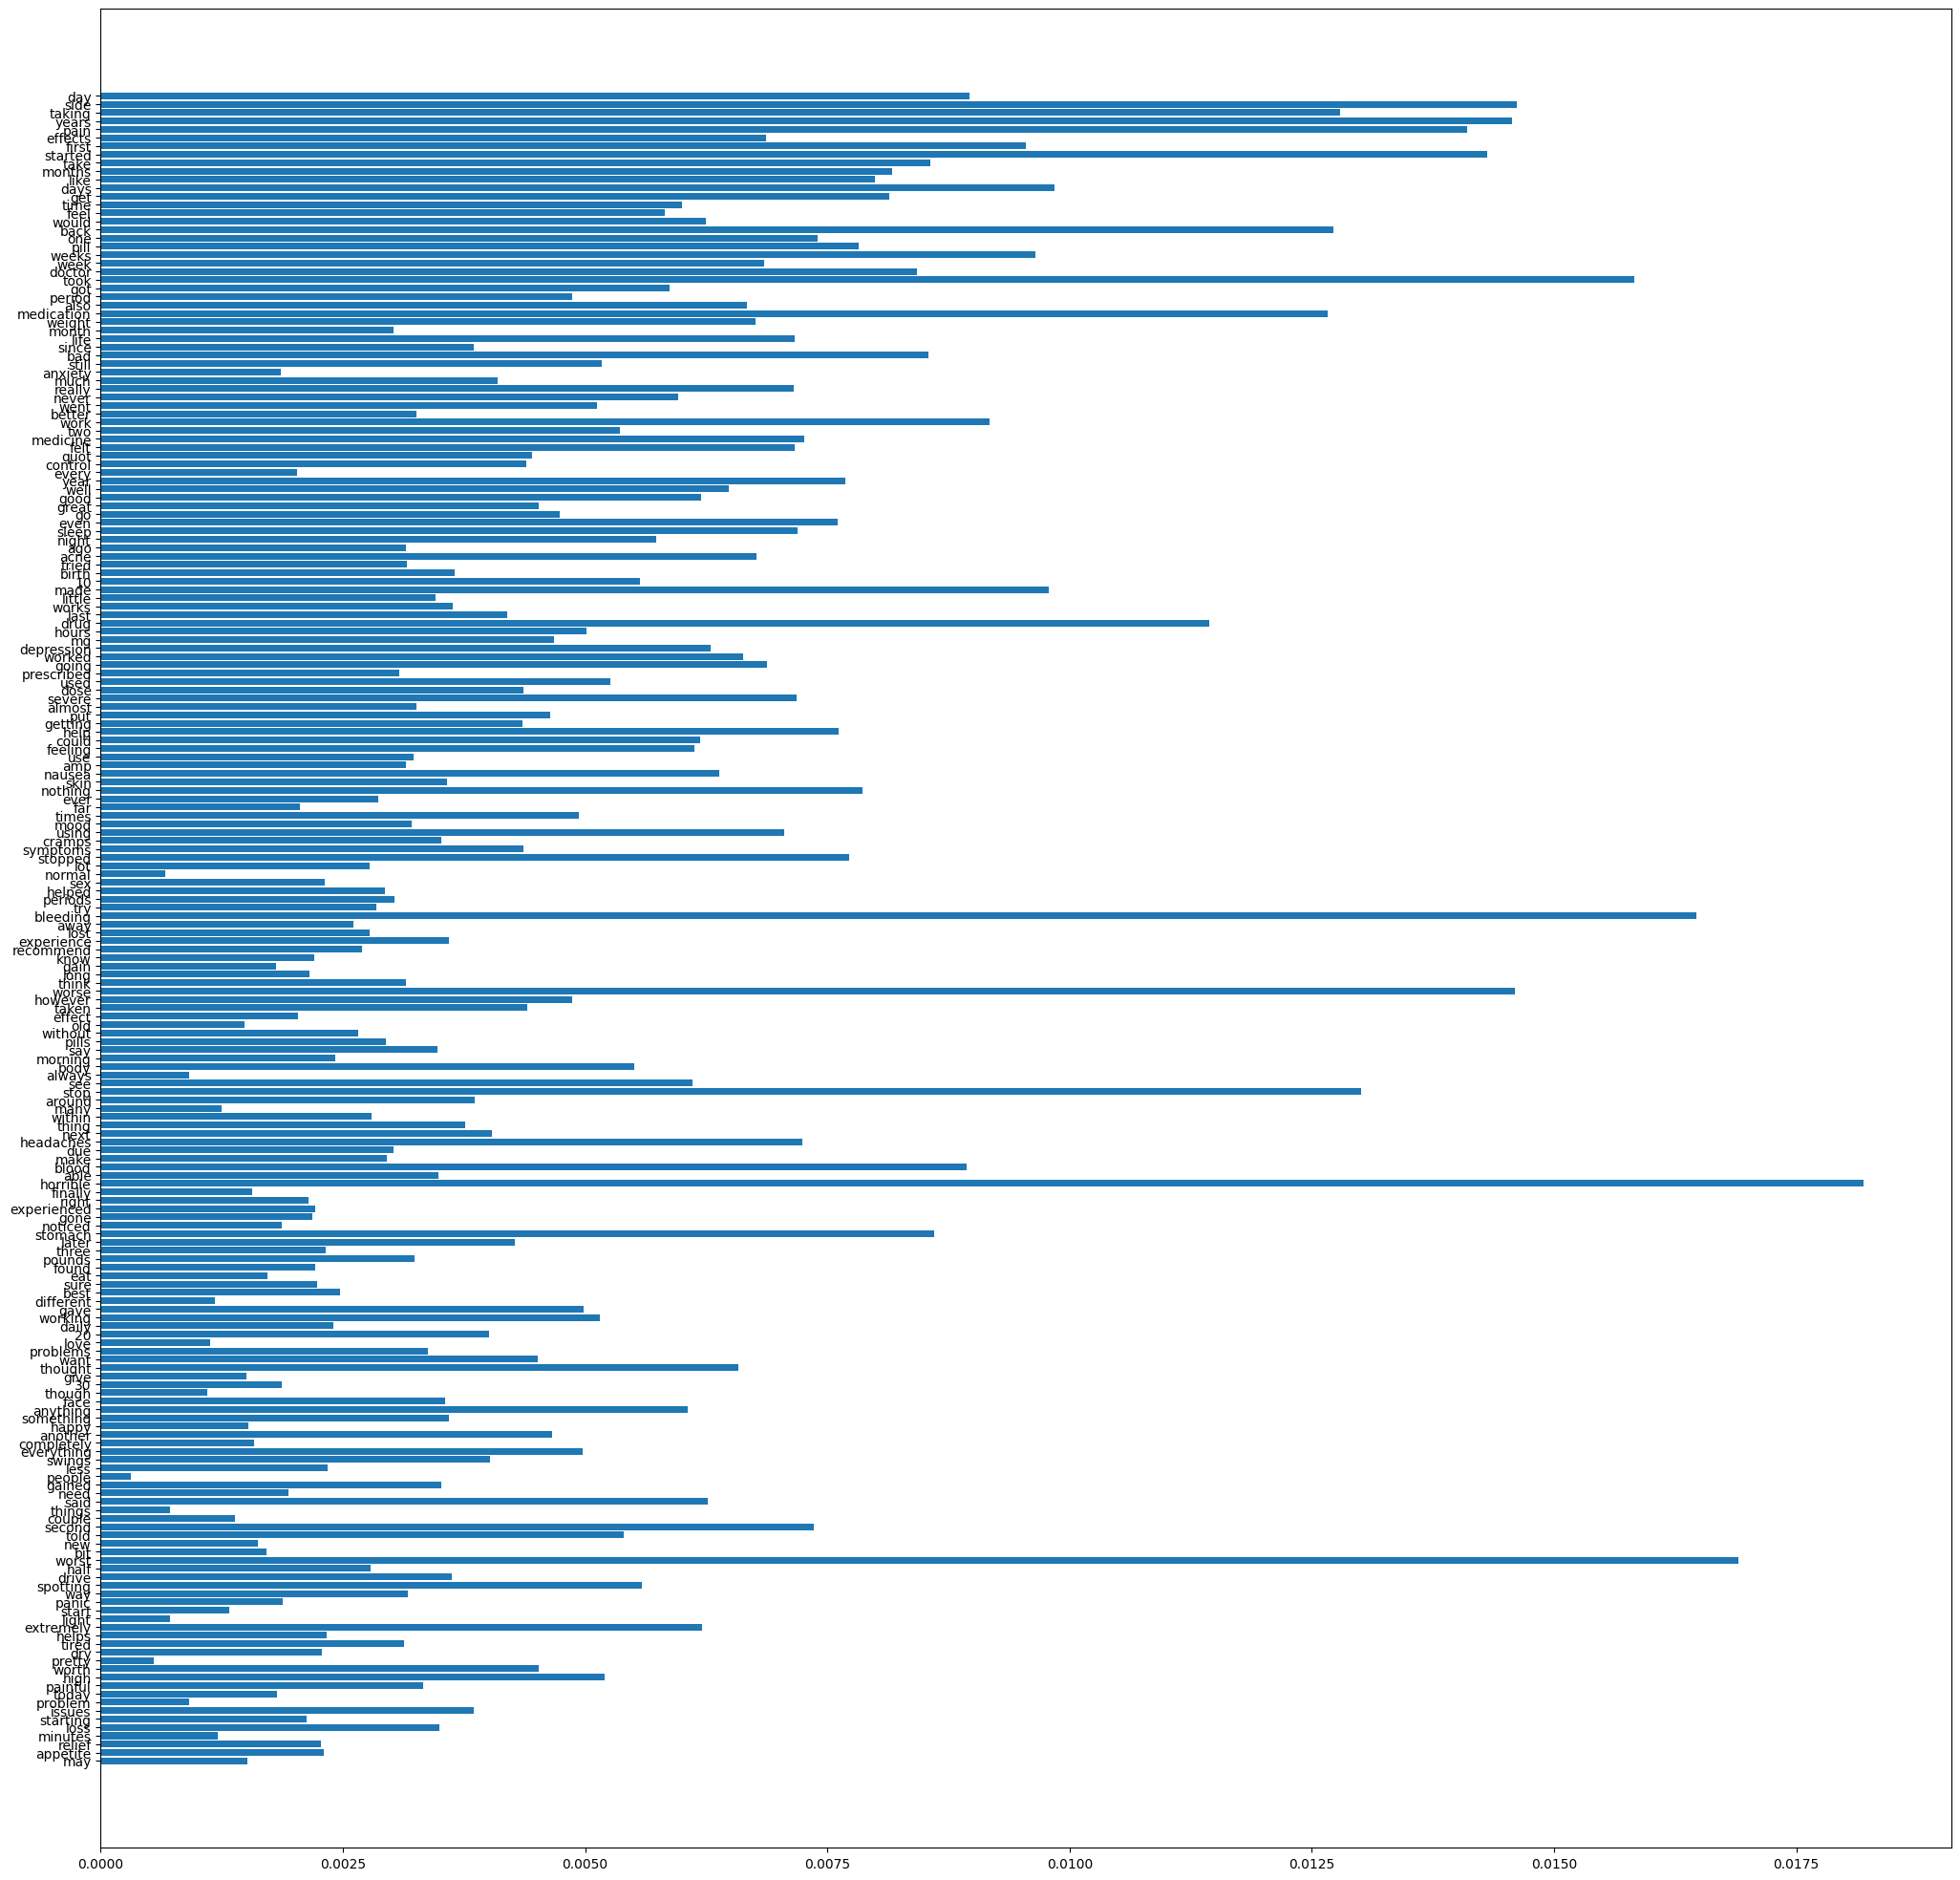

In [84]:
plt.figure(figsize=(25,25))
plt.barh(list(adic.keys()), rfr.feature_importances_)

Important features: horrible, worst, doctor

In [85]:
prds5val = rfr.predict(x_val)

In [86]:
mean_squared_error(y_val, prds5val)
                   

10.0995459

In [87]:
rmse = mean_squared_error(y_val, prds5val)**.5
rmse

3.1779782724241525

Linear regression continues to perform better.

### Pipelines


In [90]:
from sklearn.pipeline import Pipeline

In [92]:
pipe = Pipeline(steps=[("tknize", rowFrs)])

In [96]:
type(pipe)

sklearn.pipeline.Pipeline

In [95]:
pipe.fit_transform(rev)

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [99]:
linregt = linear_model.LinearRegression()
pipe1= Pipeline(steps=[("linr", linregt)])



In [103]:
pipe1.fit(x_train, y_train)

Pipeline(steps=[('linr', LinearRegression())])

In [106]:
ppred = pipe1.predict(x_train)

In [107]:
mean_squared_error( y_train, ppred)


8.141032346511635

## word embeddings, premade

Use word-embeddings to process input data so that some word-meaning is caputured. Use Stanford's premade word-embedding, "Glove".  The W2vectorizer object has method, transorm, which creates an array that has the glove vector for words in the glove dictionary, and rows of 0's for words not in the glove dictionary.

In [87]:
total_vocabulary = set(word for word in w_words_stoppedC)

In [88]:
len(total_vocabulary)

20209

In [89]:
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [90]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    def fit(self, X, y):
        return self
    # Gets the mean vector from all different words in the particular review.        
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [91]:
t1 = W2vVectorizer(glove)

In [92]:
t1.dimensions

50

In [93]:
t2 = t1.transform(Frqs)

In [94]:
np.shape(t2)

(160398, 50)

In [95]:
ys=trd.rating[0:16000]
t2 =t2[0:16000]

In [96]:
x_trainW, x_valW, y_trainW,  y_valW = train_test_split(t2, ys, random_state = 2)

In [97]:
reglW = linear_model.LinearRegression()





In [98]:
reglW.fit(x_trainW, y_trainW)

LinearRegression()

In [99]:
predsW = reglW.predict(x_trainW)

In [100]:
mean_squared_error(y_trainW, predsW)

9.3175497555418

In [101]:
rmse = mean_squared_error(y_trainW, predsW)**.5
rmse

3.0524661759865253

In [102]:
predsW = reglW.predict(x_valW)

In [103]:
mean_squared_error(y_valW, predsW)

9.242511595713813

In [104]:
rmse = mean_squared_error(y_valW, predsW)**.5
rmse

3.040149929808366

Linear regression model without embeddings still performing better.

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
regrtrw = DecisionTreeRegressor(max_depth = 3)


In [107]:
regrtrw.fit(x_trainW, y_trainW)

DecisionTreeRegressor(max_depth=3)

In [108]:
prds3w = regrtrw.predict(x_trainW)

In [109]:
mean_squared_error(y_trainW, prds3w)

10.059328144618801

In [110]:
rmse = mean_squared_error(y_trainW, prds3w)**.5
rmse

3.171644391261227

In [111]:
prdsvalW = regrtrw.predict(x_valW)

In [112]:
mean_squared_error(y_valW, prdsvalW)

9.963422304715259

In [113]:
rmse = mean_squared_error(y_valW, prdsvalW)**.5
rmse

3.156488920416997

Linear regression model still performing better. the linear regression with (TF-IDF) is the only model with an rmse less than 3.0.

<BarContainer object of 6 artists>

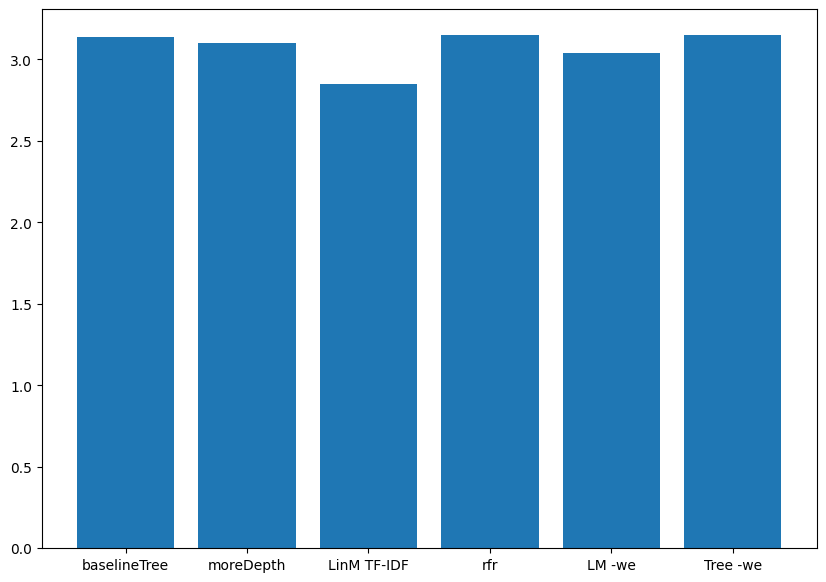

In [114]:
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(x= ['baselineTree', 'moreDepth','LinM TF-IDF', 'rfr', 'LM -we','Tree -we'], height=[3.14, 3.10, 2.85, 3.15, 3.04, 3.15])


### Use GSCV to find better models. 

In [116]:
from sklearn.model_selection import GridSearchCV

In [120]:
clf = DecisionTreeRegressor()

param_grid = {
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)



In [121]:
gs_tree.fit(x_train, y_train)


C:\Users\jmark\anaconda3\envs\dash-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jmark\anaconda3\envs\dash-env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jmark\anaconda3\envs\dash-env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\jmark\anaconda3\envs\dash-env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'min_samples_split': [1, 5, 10, 20]})

In [122]:

gs_tree.best_params_

{'max_depth': 10, 'min_samples_split': 20}

In [126]:
gspr = gs_tree.predict(x_train)

In [127]:
mean_squared_error(y_train, gspr)

8.42964054052348

Using grid-search CV, we are able to find tree models with better error metrics. 

 ### Evaluate the linear regression model on unseen data. 

In [114]:
# getting fd for second 16000 samples of data.
FrqsE = Frqs[16000:32000]


wtfids = []
for i in range(16000):
    tfidfs =list([])
    for k in adic.keys():
        num = FrqsE[i].get(k,0)
        den = adic[k]
        tfidf = num/den
        tfidfs.append(tfidf)
    wtfids.append(tfidfs)

Taking the second 16000 of the y-var (rating).

In [116]:
revscut= trd.rating[16000:32000]

In [117]:
yvals = np.asarray(revscut)

In [118]:
xvals = np.asarray(wtfids)

In [119]:
Epreds = lreg.predict(wtfids)

In [120]:
mean_squared_error(yvals, Epreds)

8.30875077189119

In [121]:
mean_squared_error(yvals, Epreds)**.5

2.88249037672135

# Results/conclusions

#![rmses]('./Images/rmses.png')


- Deploy linear regression (TF-IDF) for ‘rating extraction’ from written review.

- Gather insights on how patients rate drugs.
    - "doctor, love, worse" etc. 
    

- Combine the tf-idf and word embedding models.
- Use the “meta-data” as features. (i.e. the drug evaluated)


## Repository structure

- Notebook
- [README]('.//README.md')
- [Presentation]('.//Presentation.pdf')
- [data]('.//drugsComTrain_raw.tsv')